**Instalación de librerias necesarias**

In [1]:
!nvidia-smi

Wed Feb 28 21:25:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 6.6 MB/s eta 0:00:00


**Carga de dataset para entrenamiento del modelo**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LhPrRMoomm8563CtjYj1")
project = rf.workspace("universidad-popular-del-cesar-pmj7r").project("prueba_1-tnlwa")
dataset = project.version(2).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.221, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to prueba_1-2 in yolov8:: 100%|██████████| 1538/1538 [00:00<00:00, 5636.46it/s]


In [ ]:
import os
from PIL import Image
from glob import glob

# Ruta de la carpeta que quieres analizar
carpeta = '/content/prueba_1-2/valid/images'

# Lista de extensiones de imágenes que quieres contar
extensiones_imagenes = ['jpg', 'jpeg', 'png', 'gif', 'bmp']

# Contador de imágenes
contador_imagenes = 0

# Obtener la lista de archivos en la carpeta que tienen las extensiones deseadas
archivos = []
for extension in extensiones_imagenes:
    archivos.extend(glob(os.path.join(carpeta, f'*.{extension}')))

# Verificar si cada archivo es una imagen
for archivo in archivos:
    try:
        Image.open(archivo)
        contador_imagenes += 1
    except:
        pass  # El archivo no es una imagen

# Imprimir el resultado
print(f'La carpeta {carpeta} contiene {contador_imagenes} imágenes.')


La carpeta /content/prueba_1-2/valid/images contiene 100 imágenes.


**Entrenamiento de Yolo sobre el dataset**

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/prueba_1-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=to

**Visualización de matriz de confusión**

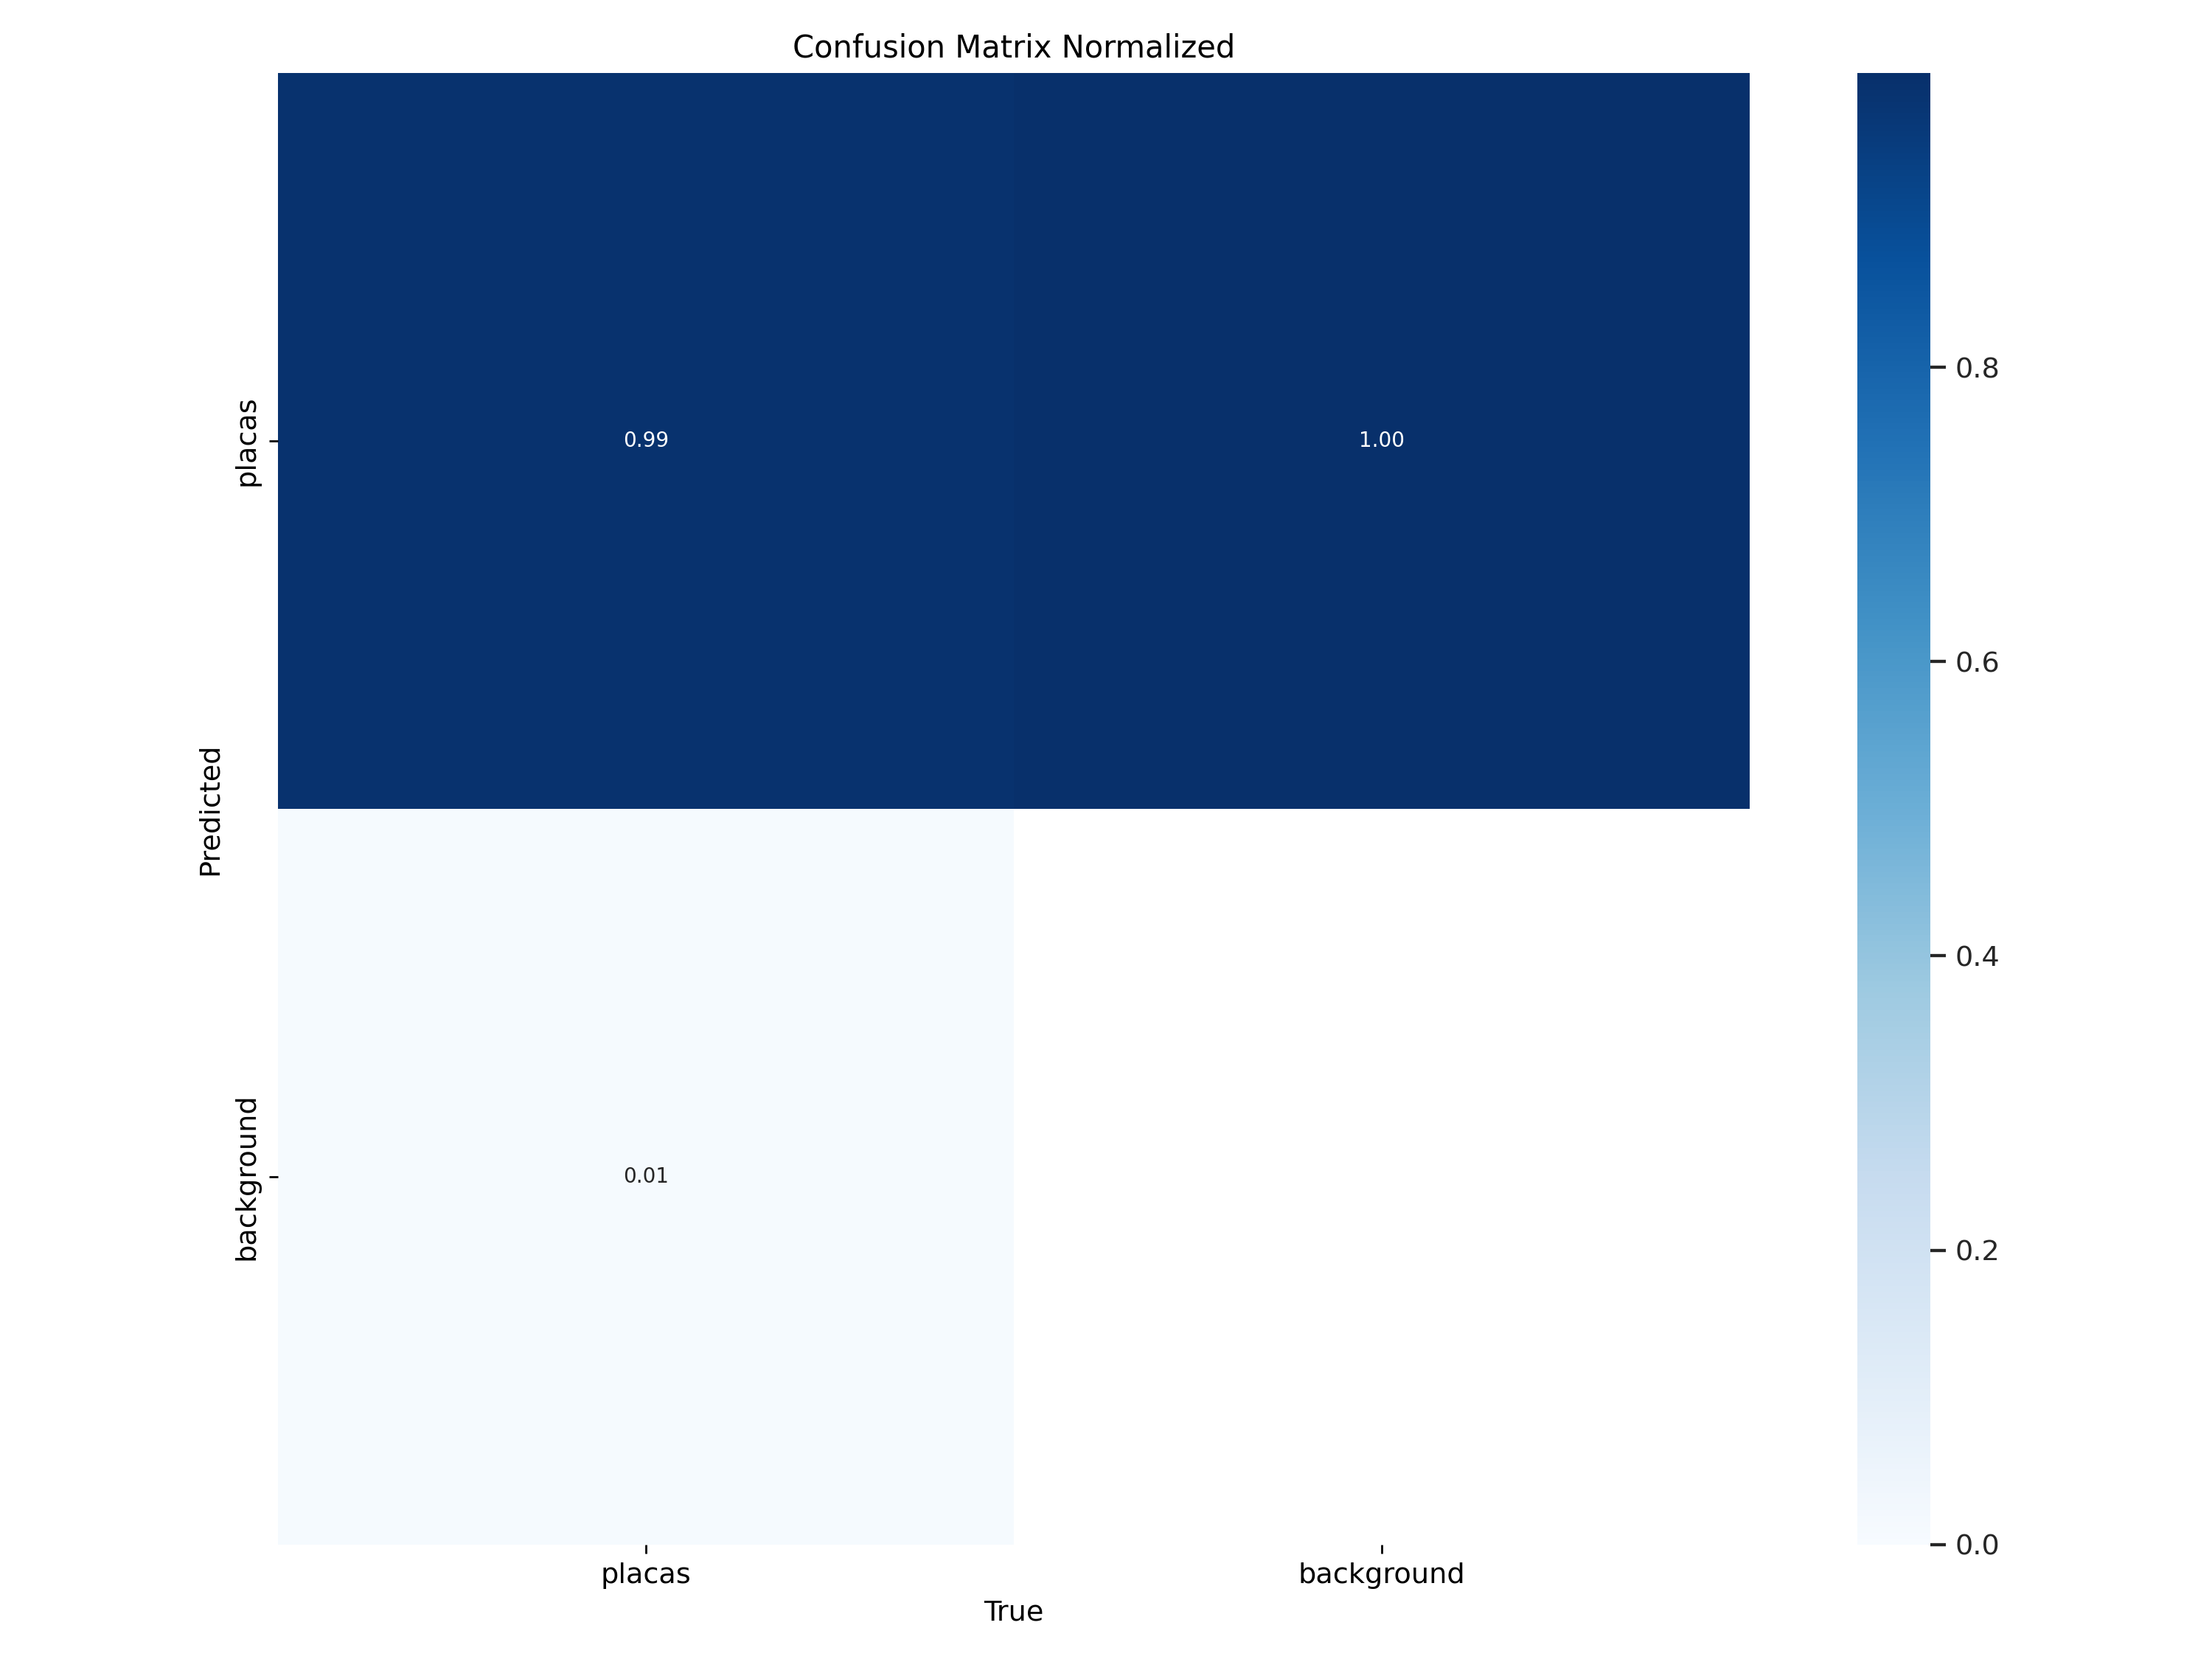

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

Image(filename=f"/content/runs/detect/train2/confusion_matrix_normalized.png", width=600)

**Inferencia del modelo sobre una imagen**

In [ ]:
# infer on a local image
import cv2

img = cv2.imread(f"/content/prueba_1-2/placa3.png")
model = YOLO("/content/runs/detect/train2/weights/best.pt")
pred = model.predict(img)[0]
pred = pred.plot()

cv2.imwrite(f"salida.png", pred) #se guarda la imagen anotada con la predicción


0: 544x640 1 placas, 202.6ms
Speed: 2.6ms preprocess, 202.6ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


True

In [ ]:
import os

ruta = "/content/prueba_1-2/train/images"

archivos = os.listdir(ruta)

extensiones_validas = [".jpg", ".jpeg", ".png", ".gif", ".bmp"]
contador_imagenes = 0

# Itera sobre los archivos y cuenta las imágenes
for archivo in archivos:
    # Comprueba si la extensión del archivo está en la lista de extensiones válidas
    if any(archivo.lower().endswith(extension) for extension in extensiones_validas):
        contador_imagenes += 1

print(f"En la carpeta {ruta} hay {contador_imagenes} imágenes.")

En la carpeta /content/prueba_1-2/train/images hay 613 imágenes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#guarda la carpeta de pesos en una ruta local del drive
#cada que se realiza un nuevo entrenamiento se genera una carpeta train#, con el numero del entrenamiento

!cp -r "/content/runs/detect/train2/weights" "/content/drive/MyDrive/Proyecto_final_PDI"

In [ ]:
# entreno nuevamente el modelo partiendo de los pesos que ya tenia guardados
!yolo task=detect mode=train model='/content/drive/MyDrive/Proyecto_final_PDI/weights/best.pt' data={dataset.location}/data.yaml epochs=5 imgsz=640


Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Proyecto_final_PDI/weights/best.pt, data=/content/prueba_1-2/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

**Validación con un uevo modelo**

In [ ]:
!yolo task=detect mode=val model='/content/drive/MyDrive/Proyecto_final_PDI/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
100% 755k/755k [00:00<00:00, 23.8MB/s]
val: Scanning /content/prueba_1-2/valid/labels... 100 images, 1 backgrounds, 0 corrupt: 100% 100/100 [00:00<00:00, 1638.39it/s]
val: New cache created: /content/prueba_1-2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 95, len(boxes) = 100. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:06<00:00,  1.07it/s]
                   all        100        100      0.985       0.98      0.991      0.792
Speed: 9.5ms preprocess, 26.6ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val6


In [ ]:
# infer on a local image
import cv2
from ultralytics import YOLO

img = cv2.imread(f"/content/prueba_1-2/placa4.png")
model = YOLO("/content/drive/MyDrive/Proyecto_final_PDI/weights/best.pt")  #/content/runs/detect/train/weights/best.pt
pred = model.predict(img)[0]
pred = pred.plot()

cv2.imwrite(f"salida.png", pred)


0: 512x640 1 placas, 108.0ms
Speed: 4.8ms preprocess, 108.0ms inference, 27.1ms postprocess per image at shape (1, 3, 512, 640)


True

**Inferencia sobre un video**

In [ ]:
# infer on a local video
import cv2
from ultralytics import YOLO


!yolo task=detect mode= predict model="/content/drive/MyDrive/Proyecto_final_PDI/weights/best.pt" conf=0.25 source="/content/drive/MyDrive/Proyecto_final_PDI/parqueadero_test.mp4"


Se han truncado las últimas 5000 líneas del flujo de salida.
video 1/1 (232/5228) /content/drive/MyDrive/Proyecto_final_PDI/parqueadero_test.mp4: 384x640 (no detections), 15.6ms
video 1/1 (233/5228) /content/drive/MyDrive/Proyecto_final_PDI/parqueadero_test.mp4: 384x640 (no detections), 15.6ms
video 1/1 (234/5228) /content/drive/MyDrive/Proyecto_final_PDI/parqueadero_test.mp4: 384x640 (no detections), 15.6ms
video 1/1 (235/5228) /content/drive/MyDrive/Proyecto_final_PDI/parqueadero_test.mp4: 384x640 (no detections), 15.3ms
video 1/1 (236/5228) /content/drive/MyDrive/Proyecto_final_PDI/parqueadero_test.mp4: 384x640 (no detections), 16.3ms
video 1/1 (237/5228) /content/drive/MyDrive/Proyecto_final_PDI/parqueadero_test.mp4: 384x640 (no detections), 15.3ms
video 1/1 (238/5228) /content/drive/MyDrive/Proyecto_final_PDI/parqueadero_test.mp4: 384x640 (no detections), 15.3ms
video 1/1 (239/5228) /content/drive/MyDrive/Proyecto_final_PDI/parqueadero_test.mp4: 384x640 (no detections), 16.0ms
vid